# NYC Taxi Project

# Data Gathering & Preparation

### Load 2016 NYC Taxi data from BigQuery

In [1]:
import pandas as pd
import os

# go to https://cloud.google.com/docs/authentication/getting-started to set up an account and an API key
# replace the below JSON file that gets downloaded
pd.set_option('display.max_columns', 500)
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="/Users/zhenyuwang/Desktop/My Final Project-bd2b409f3478.json"

Here we compute the time bewteen pickup and dropoff and generate our response variable `travel_time`. We then join the taxi data with the publicly available 2016 weather data.

In [2]:
from google.cloud import bigquery
client = bigquery.Client()

query = (
    """
    SELECT * FROM 
    (
    SELECT *,
    TIMESTAMP_DIFF( dropoff_datetime, pickup_datetime, SECOND) as travel_time,
     EXTRACT (DATE FROM pickup_datetime) as date_of_year,
     EXTRACT (DAY FROM pickup_datetime) as day_of_year,
     EXTRACT (MONTH FROM pickup_datetime) as month_of_year,
     EXTRACT (YEAR FROM pickup_datetime) as year_of_year
    FROM `bigquery-public-data.new_york.tlc_yellow_trips_2016` ) a 
    INNER JOIN
    (
     select concat(year,'-',mo,'-',da) as date_of_year2,year,mo,da,temp,visib,wdsp,gust,max,min,prcp,sndp,fog,rain_drizzle,snow_ice_pellets,hail,thunder
     from `bigquery-public-data.noaa_gsod.gsod2016` where stn='010090'
    ) weather_data
    on CAST(a.date_of_year AS STRING) = weather_data.date_of_year2
    LIMIT 200000"""
)
df=pd.io.gbq.read_gbq(query,dialect='standard')


In [3]:
df.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,travel_time,date_of_year,day_of_year,month_of_year,year_of_year,date_of_year2,year,mo,da,temp,visib,wdsp,gust,max,min,prcp,sndp,fog,rain_drizzle,snow_ice_pellets,hail,thunder
0,2,2016-02-29 08:52:02+00:00,2016-02-29 09:30:42+00:00,2,5.84,-73.970963,40.790916,1,N,-73.991661,40.731342,1,27.0,0.0,0.5,2.78,0.00,0.3,30.58,2320,2016-02-29,29,2,2016,2016-02-29,2016,02,29,18.8,999.9,15.9,999.9,21.4,16.9,0.0,999.9,0,0,0,0,0
1,1,2016-01-14 21:56:26+00:00,2016-01-14 22:36:51+00:00,1,10.10,-73.981079,40.759647,1,N,-73.850594,40.728634,1,37.0,0.5,0.5,10.96,5.54,0.3,54.80,2425,2016-01-14,14,1,2016,2016-01-14,2016,01,14,10.9,999.9,11.8,999.9,15.3,8.2,0.0,999.9,0,0,0,0,0
2,1,2016-01-13 19:44:25+00:00,2016-01-13 20:09:03+00:00,1,9.30,-73.870712,40.773834,1,N,-73.978836,40.761803,1,29.5,1.0,0.5,7.35,5.54,0.3,44.19,1478,2016-01-13,13,1,2016,2016-01-13,2016,01,13,16.6,999.9,21.7,999.9,21.0,12.9,0.0,999.9,0,0,0,0,0
3,1,2016-08-01 23:05:54+00:00,2016-08-01 23:34:36+00:00,1,7.70,NaN,NaN,1,N,NaN,NaN,1,26.5,0.5,0.5,5.55,0.00,0.3,33.35,1722,2016-08-01,1,8,2016,2016-08-01,2016,08,01,34.2,999.9,10.6,999.9,35.6,32.2,0.0,999.9,0,0,0,0,0
4,1,2016-04-10 13:47:57+00:00,2016-04-10 14:30:30+00:00,4,2.80,-73.975761,40.791576,1,N,-73.958641,40.767822,1,24.5,0.0,0.5,5.05,0.00,0.3,30.35,2553,2016-04-10,10,4,2016,2016-04-10,2016,04,10,4.1,999.9,18.6,999.9,9.7,-0.9,0.0,999.9,0,0,0,0,0


### Remove missing values

In [4]:
# Remove missing values
print('Original data size: ',len(df))
df = df.dropna()
print('After filter with NaN:', len(df))
df.head()

Original data size:  200000
After filter with NaN: 106091


,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,travel_time,date_of_year,day_of_year,month_of_year,year_of_year,date_of_year2,year,mo,da,temp,visib,wdsp,gust,max,min,prcp,sndp,fog,rain_drizzle,snow_ice_pellets,hail,thunder
0,2,2016-02-29 08:52:02+00:00,2016-02-29 09:30:42+00:00,2,5.84,-73.970963,40.790916,1,N,-73.991661,40.731342,1,27.0,0.0,0.5,2.78,0.00,0.3,30.58,2320,2016-02-29,29,2,2016,2016-02-29,2016,02,29,18.8,999.9,15.9,999.9,21.4,16.9,0.0,999.9,0,0,0,0,0
1,1,2016-01-14 21:56:26+00:00,2016-01-14 22:36:51+00:00,1,10.10,-73.981079,40.759647,1,N,-73.850594,40.728634,1,37.0,0.5,0.5,10.96,5.54,0.3,54.80,2425,2016-01-14,14,1,2016,2016-01-14,2016,01,14,10.9,999.9,11.8,999.9,15.3,8.2,0.0,999.9,0,0,0,0,0
2,1,2016-01-13 19:44:25+00:00,2016-01-13 20:09:03+00:00,1,9.30,-73.870712,40.773834,1,N,-73.978836,40.761803,1,29.5,1.0,0.5,7.35,5.54,0.3,44.19,1478,2016-01-13,13,1,2016,2016-01-13,2016,01,13,16.6,999.9,21.7,999.9,21.0,12.9,0.0,999.9,0,0,0,0,0
4,1,2016-04-10 13:47:57+00:00,2016-04-10 14:30:30+00:00,4,2.80,-73.975761,40.791576,1,N,-73.958641,40.767822,1,24.5,0.0,0.5,5.05,0.00,0.3,30.35,2553,2016-04-10,10,4,2016,2016-04-10,2016,04,10,4.1,999.9,18.6,999.9,9.7,-0.9,0.0,999.9,0,0,0,0,0
5,1,2016-02-09 07:13:21+00:00,2016-02-09 07:30:45+00:00,1,7.60,-73.954506,40.789471,1,N,-73.917717,40.868759,1,23.5,0.0,0.5,4.85,0.00,0.3,29.15,1044,2016-02-09,9,2,2016,2016-02-09,2016,02,09,22.0,999.9,25.8,999.9,25.7,15.8,0.0,999.9,0,0,0,0,0


## Visualize the features of each value
In order to analyse features, I first visualize all features and oberserve the abnormal values of each feature. Meanwhile, I find that some features are useless due to the single value, for example, hail feature in weather.

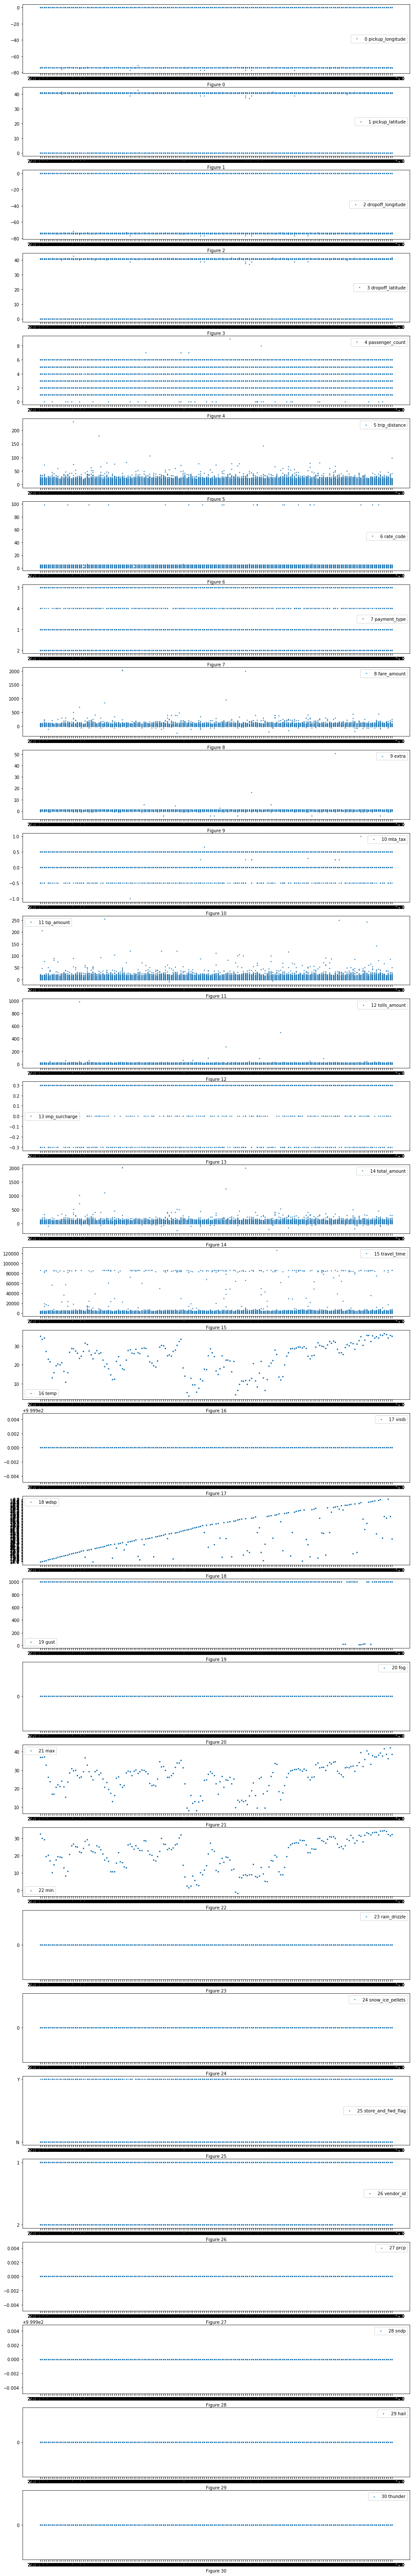

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

## We select candidate features from original dataframe.

focused_features = ['pickup_longitude', 'pickup_latitude','dropoff_longitude','dropoff_latitude',\
                    'passenger_count', 'trip_distance',\
                    'rate_code', 'payment_type','fare_amount','extra', \
                    'mta_tax', 'tip_amount','tolls_amount','imp_surcharge', \
                    'total_amount', 'travel_time','temp', 'visib','wdsp','gust',\
                    'fog', 'max', 'min','rain_drizzle','snow_ice_pellets','store_and_fwd_flag',\
                    'vendor_id', 'prcp','sndp','hail', 'thunder'\
                   ]

feature = 'pickup_longitude'

## Number of features
rows = len(focused_features)
from datetime import datetime

plt.figure(figsize=(16,rows*3.5))
df= df.sort_values(by=['date_of_year'])
## Visualize each feature to analyse the abnormal values
xr =[ str(x)[:10]for x in df['date_of_year']]
for idx, feature in enumerate(focused_features):
    plt.subplot(rows,1,idx+1)
    plt.scatter(xr, df[feature], s=2, label=str(idx)+' '+feature)
    plt.xticks(xr[::10])
    plt.xlabel('Figure '+ str(idx))
    plt.legend()




### Filter noise for each feature according to the observations above
Based on the above plots, we can determine the normal range of each feature. For example in figure 0 of feature `pickup_longitude`, the value 0 of `pickup_longitude` is impossible for the coordinates in New York. Thus we give the the minimum and maximum values of `pickup_longitude` as -100 and -50, respectively. i.e., `filters[0] = (-100, -50)`

In [6]:
filters = {}

## filters[i] =(min, max) : remove ith feature with min/max filter, values below are dertermined by figures above
filters[0] = (-100, -50)
filters[1] = (20, 70)
filters[2] = (-100, -50)
filters[3] = (20, 70)
filters[4] = (1, 7)
filters[5] = (0, 70)
filters[6] = (0,50)
filters[8] = (0,1000)
filters[9] = (-2, 2)
filters[10] = (-0.5,0.5)
filters[11] = (0, 100)
filters[12] = (-20, 200)
filters[14] = (0, 1000)
filters[15] = (0, 36000)
filters[19] = (500,2000)

## Initialize boolean filter
bools = df['pickup_longitude'] > -1000

## Join filters of all features
for k, v in filters.items():
    bools = bools & (df[focused_features[k]] >= v[0]) & (df[focused_features[k]]<=v[1])
    
## Select qualified values
df = df[bools]

print("After filter with abnormal features: ", len(df))

After filter with abnormal features:  98464


# Feature Engineering

### [Information leakage] With the raw features, we can compute some useful high-level features. 
Here we extend three features, `L2_distance`, `from_center_distance`, `dropoff2center_distance`:
* `L2_distance` is the direct Euclidean distance from the pickup location to the dropoff location of each trip. This is because the travel time of the trip is strongly connected to the `L2_distance`.
* `pickup2center_distance` is the distance from the pickup location to the city center. From our oberservation, if the pickup location is near to the city center, we are likely to spend more time on taxi.
* `dropoff2center_distance` is the distance from the dropoff location to the city center.

In [7]:
from pyproj import Proj, transform
import math

## Convert coordinates from WGS84 to Mercator format 
def WGS84_to_Mercator(lng, lat):
    return (transform(Proj(init='epsg:4326'), Proj(init='epsg:3857'), lng, lat))

## Euclidean distance of Mercator coordinates
def L2_distance(p1, p2):
    return math.sqrt((p1[0]-p2[0])**2 + (p1[1]-p2[1])**2)


datasize= len(df['pickup_longitude'])

## Compute distance between pickup location and dropoff location
distances = []
for i in range(datasize):
    p1 = WGS84_to_Mercator(df['pickup_longitude'].iloc[i], df['pickup_latitude'].iloc[i])
    p2 = WGS84_to_Mercator(df['dropoff_longitude'].iloc[i], df['dropoff_latitude'].iloc[i])
    distances += [L2_distance(p1, p2)]

df['L2_distance'] = distances

## Coordinates of city center
center_lng = df['pickup_longitude'].mean()
center_lat = df['pickup_latitude'].mean()
p_center = WGS84_to_Mercator(center_lng, center_lat)

pickup_distances = []
dropoff_distances = []

## Compute pickup2center_distance and dropoff2center_distance
for i in range(datasize):
    p1 = WGS84_to_Mercator(df['pickup_longitude'].iloc[i], df['pickup_latitude'].iloc[i])
    p2 = WGS84_to_Mercator(df['dropoff_longitude'].iloc[i], df['dropoff_latitude'].iloc[i])
    pickup_distances += [L2_distance(p1, p_center)]
    dropoff_distances += [L2_distance(p2, p_center)]
df['pickup2center_distance'] = pickup_distances
df['dropoff2center_distance'] = dropoff_distances

### One hot encoding,  Normalization, Remove useless features
Normally, we need to use one hot encoding on categorical feature and use normalization on numerical feature. However, in our experiments, we found that some numerical features can be categorized. For example, `mta_tax` feature only contains 8 types of values (-2.7,-1.0, ..., 0.5). Thus, we use one hot encoding on `mta_tax` feature as (mta_tax_-2.7,mta_tax_-1.0,mta_tax_-0.5,	mta_tax_0.0,	mta_tax_0.05,	mta_tax_0.25,	mta_tax_0.3	mta_tax_0.5).
* We define a threshold `Value_Count_Threshold` to determine each feature to be one hot encoded or be normalized. If the number of value types of a feature is less than `Value_Count_Threshold`, we use one hot encoding. Otherwise, we apply normalization on the feature.

In [8]:

clean_df = pd.DataFrame()
## Add distance feature
focused_features += ['L2_distance', 'pickup2center_distance', 'dropoff2center_distance']
Value_Count_Threshold = 10
## Merge all processed features
for idx, feature in enumerate(focused_features):
    
    ## Remove trip_distance feature which is inaccessible in prediction phase
    if feature == 'trip_distance': continue
        
    ## Keep the target feature unchanged
    if feature == 'travel_time':
        clean_df[feature] = df[feature]
        continue
    ## Count the values of each feature
    value_num = len(df[feature].value_counts())
    print(idx, feature, value_num)
    
    ## Remove useless feature
    if value_num <= 1: continue
        
    if value_num <=10:
        ## One-Hot encoding on categorical feature
        temp_df = pd.get_dummies(df[feature], prefix=feature)
        clean_df = pd.concat([clean_df, temp_df], axis=1)
        
    else:
        ## Min-Max normalization on numerical feature.
        df[feature] = df[feature].astype(float)
        clean_df[feature] = (df[feature]- df[feature].min())/(df[feature].max()-df[feature].min())
print(clean_df.shape)        
clean_df.head()

0 pickup_longitude 14829
1 pickup_latitude 26456
2 dropoff_longitude 25584
3 dropoff_latitude 42386
4 passenger_count 7
6 rate_code 6
7 payment_type 4
8 fare_amount 490
9 extra 3
10 mta_tax 3
11 tip_amount 1570
12 tolls_amount 251
13 imp_surcharge 2
14 total_amount 3435
16 temp 133
17 visib 1
18 wdsp 121
19 gust 1
20 fog 1
21 max 103
22 min 111
23 rain_drizzle 1
24 snow_ice_pellets 1
25 store_and_fwd_flag 2
26 vendor_id 2
27 prcp 1
28 sndp 1
29 hail 1
30 thunder 1
31 L2_distance 97231
32 pickup2center_distance 92819
33 dropoff2center_distance 96863
(98464, 45)


,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count_1,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6,passenger_count_7,rate_code_1,rate_code_2,rate_code_3,rate_code_4,rate_code_5,rate_code_6,payment_type_1,payment_type_2,payment_type_3,payment_type_4,fare_amount,extra_0.0,extra_0.5,extra_1.0,mta_tax_0.0,mta_tax_0.25,mta_tax_0.5,tip_amount,tolls_amount,imp_surcharge_0.0,imp_surcharge_0.3,total_amount,travel_time,temp,wdsp,max,min,store_and_fwd_flag_N,store_and_fwd_flag_Y,vendor_id_1,vendor_id_2,L2_distance,pickup2center_distance,dropoff2center_distance
29286,0.550097,0.660559,0.726702,0.842005,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0.037846,1,0,0,0,0,1,0.0000,0.000000,0,1,0.036950,1152,0.954955,0.377622,0.85,0.947222,1,0,0,1,0.026831,0.017114,0.007522
29087,0.555177,0.681415,0.739632,0.856624,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0.038574,0,1,0,0,0,1,0.0278,0.000000,0,1,0.042162,1137,0.954955,0.377622,0.85,0.947222,1,0,0,1,0.029592,0.045553,0.023194
29088,0.526406,0.647885,0.725188,0.846337,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0.037118,0,1,0,0,0,1,0.0800,0.000000,0,1,0.047980,1408,0.954955,0.377622,0.85,0.947222,1,0,1,0,0.028244,0.018010,0.012323
29090,0.530541,0.655146,0.733403,0.859834,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0.048035,1,0,0,0,0,1,0.0600,0.000000,0,1,0.054874,2023,0.954955,0.377622,0.85,0.947222,1,0,0,1,0.035192,0.008588,0.026338
29091,0.530494,0.652224,0.747547,0.839285,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0.038574,0,1,0,0,0,1,0.0665,0.057986,0,1,0.055136,1518,0.954955,0.377622,0.85,0.947222,1,0,1,0,0.028471,0.009956,0.013121


In [21]:
clean_df

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count_1,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6,passenger_count_7,rate_code_1,rate_code_2,rate_code_3,rate_code_4,rate_code_5,rate_code_6,payment_type_1,payment_type_2,payment_type_3,payment_type_4,fare_amount,extra_0.0,extra_0.5,extra_1.0,mta_tax_0.0,mta_tax_0.25,mta_tax_0.5,tip_amount,tolls_amount,imp_surcharge_0.0,imp_surcharge_0.3,total_amount,travel_time,temp,wdsp,max,min,store_and_fwd_flag_N,store_and_fwd_flag_Y,vendor_id_1,vendor_id_2,L2_distance,pickup2center_distance,dropoff2center_distance
29286,0.550097,0.660559,0.726702,0.842005,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0.037846,1,0,0,0,0,1,0.0000,0.000000,0,1,0.036950,1152,0.954955,0.377622,0.85,0.947222,1,0,0,1,0.026831,0.017114,0.007522
29087,0.555177,0.681415,0.739632,0.856624,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0.038574,0,1,0,0,0,1,0.0278,0.000000,0,1,0.042162,1137,0.954955,0.377622,0.85,0.947222,1,0,0,1,0.029592,0.045553,0.023194
29088,0.526406,0.647885,0.725188,0.846337,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0.037118,0,1,0,0,0,1,0.0800,0.000000,0,1,0.047980,1408,0.954955,0.377622,0.85,0.947222,1,0,1,0,0.028244,0.018010,0.012323
29090,0.530541,0.655146,0.733403,0.859834,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0.048035,1,0,0,0,0,1,0.0600,0.000000,0,1,0.054874,2023,0.954955,0.377622,0.85,0.947222,1,0,0,1,0.035192,0.008588,0.026338
29091,0.530494,0.652224,0.747547,0.839285,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0.038574,0,1,0,0,0,1,0.0665,0.057986,0,1,0.055136,1518,0.954955,0.377622,0.85,0.947222,1,0,1,0,0.028471,0.009956,0.013121
29092,0.534693,0.660684,0.719661,0.833582,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0.032751,0,1,0,0,0,1,0.0475,0.000000,0,1,0.039363,1339,0.954955,0.377622,0.85,0.947222,1,0,1,0,0.019933,0.008609,0.013427
29094,0.531259,0.659329,0.735178,0.863836,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0.032751,0,1,0,0,0,1,0.0475,0.000000,0,1,0.039363,994,0.954955,0.377622,0.85,0.947222,1,0,1,0,0.033601,0.009681,0.031253
29086,0.528116,0.653762,0.733665,0.862778,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0.055313,0,1,0,0,0,1,0.0982,0.000000,0,1,0.067724,2847,0.954955,0.377622,0.85,0.947222,1,0,0,1,0.043232,0.011888,0.029918
29096,0.537235,0.671634,0.731535,0.815087,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0.073508,0,1,0,0,0,1,0.1036,0.000000,0,1,0.085702,3072,0.954955,0.377622,0.85,0.947222,1,0,0,1,0.065659,0.024820,0.027842
29106,0.551272,0.659795,0.727274,0.843327,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0.042940,1,0,0,0,0,1,0.1075,0.057986,0,1,0.064235,1176,0.954955,0.377622,0.85,0.947222,1,0,1,0,0.027717,0.017961,0.008271


## 1.2 Compute haversine distance between pickup and dropoff

In [6]:
from google.cloud import bigquery
client = bigquery.Client()


query = (
    """
CREATE TEMP FUNCTION RADIANS(x FLOAT64) AS (
  ACOS(-1) * x / 180
);
CREATE TEMP FUNCTION RADIANS_TO_KM(x FLOAT64) AS (
  111.045 * 180 * x / ACOS(-1)
);
CREATE TEMP FUNCTION HAVERSINE(lat1 FLOAT64, long1 FLOAT64,
                               lat2 FLOAT64, long2 FLOAT64) AS (
  RADIANS_TO_KM(
    ACOS(COS(RADIANS(lat1)) * COS(RADIANS(lat2)) *
         COS(RADIANS(long1) - RADIANS(long2)) +
         SIN(RADIANS(lat1)) * SIN(RADIANS(lat2))))
);

SELECT
  pickup_latitude,
  pickup_longitude,
  TIMESTAMP_DIFF( dropoff_datetime, pickup_datetime, SECOND) as travel_time,
  HAVERSINE(dropoff_latitude,dropoff_longitude, pickup_latitude, pickup_longitude) AS distance_in_km
FROM `nyc-tlc.yellow.trips`
WHERE pickup_latitude IS NOT NULL AND pickup_longitude IS NOT NULL and dropoff_longitude IS NOT NULL and HAVERSINE(dropoff_latitude,dropoff_longitude, pickup_latitude, pickup_longitude)>0.1 LIMIT 100;
"""
)
df2=pd.io.gbq.read_gbq(query,dialect='standard')

In [7]:
df2.head()

,pickup_latitude,pickup_longitude,travel_time,distance_in_km
0,40.757960,-73.987630,35,1.240719
1,40.758817,-73.984630,843,3.473030
2,40.771859,-73.871434,321,1.183891
3,0.000000,0.000000,12,8650.632979
4,40.699852,-74.133125,6,0.117585


In [15]:
%matplotlib inline

# 2. Remove outliers and filter data

In [16]:
df_filtered=df[(df['travel_time']>0) & (df['distance_in_km']<50)  & (df['travel_time']<1000)]

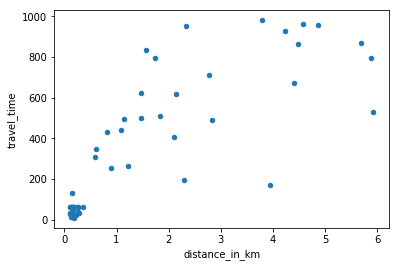

In [17]:
df_filtered.plot(x='distance_in_km',y='travel_time',kind='scatter')

# 3. Build a model and evaluate it

Test Train Split

In [25]:
import numpy as np
from sklearn.model_selection import train_test_split
y = df_filtered['travel_time']
X = df_filtered['distance_in_km']

X=np.matrix(X).reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

## Random forest model

In [23]:
from sklearn.ensemble import RandomForestRegressor

rf_clf = RandomForestRegressor(n_estimators=100,
                             random_state=0)




rf_clf.fit(X_train,y_train)
rf_clf.score(X_test,y_test)

0.7357283985996055

`rf_clf.score` is actually the $R^2$ score (see documentation)

## Linear model
     

In [10]:
import numpy as np
from sklearn.model_selection import train_test_split
y = clean_df['travel_time'] # y is the variable travel time which we should make predictions.
X = clean_df.drop(columns=['travel_time']) # X is matrix of features. In this case, we choose  all features listed in clean_df.

X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X, y, test_size=0.2, random_state=42) # 80% train, 20% test using 5-fold cross validation

In [24]:
m=(X.T).dot(X) # The covariance of matrix X.
m

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count_1,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6,passenger_count_7,rate_code_1,rate_code_2,rate_code_3,rate_code_4,rate_code_5,rate_code_6,payment_type_1,payment_type_2,payment_type_3,payment_type_4,fare_amount,extra_0.0,extra_0.5,extra_1.0,mta_tax_0.0,mta_tax_0.25,mta_tax_0.5,tip_amount,tolls_amount,imp_surcharge_0.0,imp_surcharge_0.3,total_amount,temp,wdsp,max,min,store_and_fwd_flag_N,store_and_fwd_flag_Y,vendor_id_1,vendor_id_2,L2_distance,pickup2center_distance,dropoff2center_distance
pickup_longitude,28478.652788,34699.107307,38746.496801,44353.475913,37178.790078,7985.062730,2174.677500,1045.981685,2871.013307,1682.944008,1.064947,50731.767614,3.749723,890.309271,214.902229,1096.650125,2.155293,35859.450295,16153.220218,757.227762,169.635981,2392.839235,25853.057146,19698.491437,7387.985672,1768.728118,0.008316,51170.797820,2388.027633,1108.092376,39.383681,52900.150574,2822.642500,31822.746870,18091.576108,28133.010308,32650.111470,52433.389283,506.144973,24352.534435,28586.999820,1577.241805,824.334180,989.574790
pickup_latitude,34699.107307,42310.514299,47232.206359,54077.047415,45323.393849,9740.012439,2650.330310,1276.816696,3495.938404,2052.216099,1.332062,61841.040478,4.574565,1100.354410,250.771709,1340.673472,2.625225,43745.783682,19663.409718,924.095230,206.751229,2907.282745,31514.248058,24050.054887,8975.736914,2175.280515,0.624939,62364.134406,2905.136328,1349.509309,49.224778,64490.815082,3430.723237,38793.150089,22054.002498,34294.007466,39801.885146,63923.664615,616.375244,29708.850452,34831.189407,1913.049812,990.817491,1205.345520
dropoff_longitude,38746.496801,47232.206359,52765.638577,60380.963819,50606.162687,10874.605100,2960.880128,1424.159674,3902.305657,2289.989954,1.438458,69126.872882,5.167426,1138.844704,304.590161,1481.127837,2.938648,48762.386256,22031.560522,1033.657192,231.937689,3247.556288,35115.766990,26941.753738,10002.020930,2326.451146,0.011341,69733.079171,3237.145409,1490.806241,54.173778,72005.367880,3829.017645,43314.629134,24621.154579,38292.117643,44440.524257,71371.038973,688.502685,33172.358827,38887.182831,2141.646439,1112.290484,1349.710743
dropoff_latitude,44353.475913,54077.047415,60380.963819,69137.714780,57934.744111,12450.193060,3388.900418,1632.101566,4465.864072,2622.455440,1.757354,79045.576285,5.796616,1385.680580,329.820922,1725.784429,3.357188,55880.447612,25167.891997,1182.945113,264.731298,3717.680504,40287.275690,30739.239650,11469.500680,2768.438734,0.799044,79726.778241,3711.224107,1721.332835,62.811396,82433.204624,4385.894385,49588.091123,28189.093592,43837.683123,50877.266032,81708.745303,787.270717,37975.356302,44520.659718,2447.853367,1269.897147,1541.048087
passenger_count_1,37178.790078,45323.393849,50606.162687,57934.744111,69148.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,66190.000000,5.000000,1097.000000,273.000000,1579.000000,4.000000,47196.000000,20415.000000,1264.000000,273.000000,3086.338370,33960.000000,25502.000000,9686.000000,2385.000000,2.000000,66761.000000,3143.150900,1398.292234,66.000000,69082.000000,3646.485234,41454.183183,23706.290210,36647.944118,42541.627778,68414.000000,734.000000,35845.000000,33303.000000,2032.372271,1069.828462,1294.890220
passenger_count_2,7985.062730,9740.012439,10874.605100,12450.193060,0.000000,14859.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14169.000000,0.000000,302.000000,60.000000,328.000000,0.000000,9937.000000,4792.000000,104.000000,26.000000,694.917787,7080.000000,5708.000000,2071.000000,553.000000,0.000000,14306.000000,662.052900,339.238434,4.000000,14855.000000,816.997243,9021.891892,5035.500000,7974.611765,9245.438889,14698.000000,161.000000,6947.000000,7912.000000,453.430125,228.145898,281.783611
passenger_count_3,2174.677500,2650.330310,2960.880128,3388.900418,0.000000,0.000000,4045.000000,0.000000,0.000000,0.000000,0.000000,3857.000000,2.000000

From the table we can see most features have positive values of covariance, meaning they have similar behiviour or they are positively related. 

In [26]:
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.model_selection import train_test_split
linear_clf = LinearRegression() # linear regression model, we use orignal data without normalization because after normalization the result will be wrong.
linear_clf.fit(X_train1,y_train1)
linear_clf.score(X_test1,y_test1)

0.47921029393699044

$R^{2}$ is 0.479, this model is not good, but we can take it as a reference to compare with other model.

In [13]:
from sklearn import preprocessing #normalization
X_train = preprocessing.scale(X_train1) 
X_test= preprocessing.scale(X_test1)
y_train= y_train1 - np.mean(y_train1)
y_test=y_test1-np.mean(y_test1)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by the scale function.
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by the scale function.
  This is separate from the ipykernel package so we can avoid doing imports until


Here we apply normlization after train test split, because normalization is to set the average value of the data to be zero and standard variance to be one, which will be convenient to test linear model since all data are set in the same scale and the number of iteration needed is less. We should do this after split because  the data is randomly split, and if we do normlization before, the data will lose characterization of normalization after split.  

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


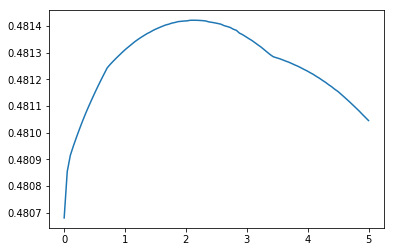

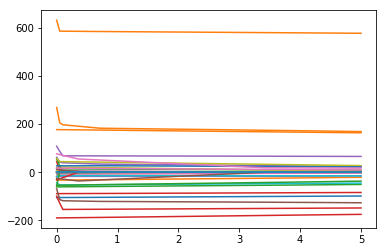

0.4814213336945101

In [20]:
from sklearn.linear_model import Lasso # Here we use Lasso model(L1)
import matplotlib.pyplot as plt
alphas = np.linspace(0,5,100) # Find optimal alpha
r2la=[]
corl=[]
for i in range(100):
    reg = Lasso(alphas[i]).fit(X_train, y_train)
    r2la.append(reg.score(X_test, y_test))
    corl.append(reg.coef_)
plt.plot(alphas,r2la) # plot alpha and R2 scores
plt.show()
plt.plot(alphas,corl)# plot alpha and cofficients
plt.show()
max(r2la) # maximum score

In [22]:
alphas[np.argmax(r2la)]

2.121212121212121

Lasso often set cofficients to zero because its level set is box, and it can eliminating collinear features. In this case, we find that covariance table have positive values, so they are colinear features.Plus, this data have more than 40 features, and Lasso is a good choice for in high dimensional data.
Here, we find best alpha is 2.12, best $R^{2}$ score is 0.481. The optimal cofficients have many zero components.

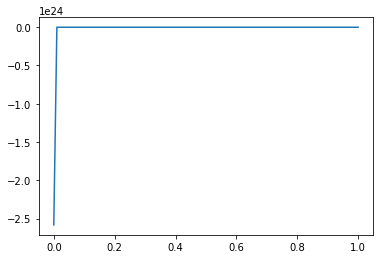

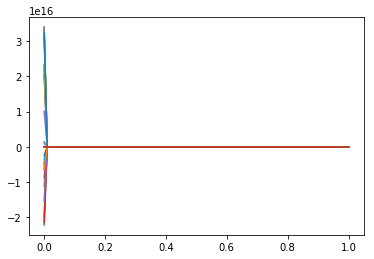

0.48236649117593733

In [41]:
import numpy as np
from sklearn.linear_model import Ridge # Ridge model(L2)
import matplotlib.pyplot as plt
alphas = np.linspace(0,1,100) # Find optimal alpha
r2re=[]
corre=[]
for i in range(100):
    clf = Ridge(alphas[i]).fit(X_train, y_train)
    r2re.append(clf.score(X_test, y_test))
    corre.append(clf.coef_)
plt.plot(alphas,r2re) # plot alpha and R2 scores
plt.show()
plt.plot(alphas,corre) # plot alpha and cofficients
plt.show()
max(r2re) # maximum score

In [42]:
alphas[np.argmax(r2re)]


0.09090909090909091

Ridge nodel allows cofficients to decay smoothly because its level sets are circles. It distributes the errors evenly among the remaining features. So the total error of ridge model is smaller than Lasso model. Also, this model set the sum of cofficients to be zero to decreases error. 
Here, we have maximum $R_{2}$ score is 0.482 and optimal alpha is 0.09.

In this section, we have a overall view of linear model selection. We can see that linear regression has a lowest score, while Lasso and Ridge have approximate same score. Most importantly, the linear models don't have a ideal fit for the data, because the data has very large size and many features, which causes very big variance and complicated trends. We assume other models have better proformance.  